<a href="https://colab.research.google.com/github/gkothari25/fashion_mnist_classification/blob/main/capgemini_assignment_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [71]:
#select the 5k images having 500 each class
import numpy as np
import random

index_dict = {}
count_index = 0
val_dict = {}
count_val = 0

#create a tensor and copy the desired data from the all the data files to that.
train_t = np.ones((5000,28,28))
lable_train = []
val_t = np.ones((1500,28,28))
lable_val = []

for k in list(set(y_train)):
  index_list = []
  
  for sn,i in enumerate(zip(x_train,y_train)):
    if int(i[1]) == k:
      index_list.append(sn) 
  index_dict[k] = index_list

  #select the n random value from the list
  random.seed(4)
  t_list = random.sample(index_list,k=500)
  resid_list = list(set(index_list).difference(t_list))
  val_list = random.sample(resid_list,k=150)
  val_dict[k] = val_list
  
  for index in t_list:
    train_t[count_index] = x_train[index]
    lable_train.append(k)
    count_index  = count_index + 1
  print("tr",t_list[:10])

  for val in val_list:
    val_t[count_val] = x_train[val]
    lable_val.append(k)
    count_val = count_val + 1
  print("val",val_list[:10])


tr [19956, 25226, 9027, 59117, 32905, 39573, 13359, 7939, 5838, 1647]
val [25602, 2938, 50981, 29489, 40924, 32831, 29251, 36328, 44096, 25535]
tr [19119, 24566, 7891, 59137, 32384, 39255, 12464, 6885, 4928, 1548]
val [42072, 52030, 34546, 29413, 24454, 49221, 12767, 3462, 11358, 9256]
tr [19487, 24888, 8347, 59142, 32726, 39833, 12635, 7347, 5371, 1641]
val [42134, 19279, 34581, 29434, 24556, 45, 29219, 19860, 11450, 25667]
tr [19207, 24547, 8352, 58942, 32011, 38931, 12695, 7239, 5344, 1667]
val [42118, 2923, 18286, 13161, 24589, 16433, 29306, 19870, 44228, 58422]
tr [19661, 25063, 8705, 59195, 32914, 39665, 12832, 7773, 5557, 1717]
val [9235, 35714, 1934, 12911, 24600, 16438, 12686, 36304, 11149, 9162]
tr [19072, 24820, 8551, 59121, 32162, 39051, 12607, 7404, 5541, 1575]
val [42086, 19196, 1769, 45838, 57323, 16420, 12838, 36196, 27779, 42040]
tr [18883, 24064, 8310, 58928, 31587, 38545, 12173, 7385, 5532, 1687]
val [25674, 2985, 50989, 29317, 8144, 55, 45448, 52679, 27748, 25609]
t

In [2]:
#now lets create a network for the classification with 5 CNN layers.
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras.regularizers import l2


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()

model.add(Dropout(0.3))
model.add(Dense(10))

model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0

In [88]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [91]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
epochs=60

# train_data   = np.expand_dims(train_t, axis=1)
train_data =    train_t.reshape(train_t.shape[0],28,28,1)
train_lables = np.array(lable_train)
one_hot_label_train = to_categorical(train_lables)

# val_data = np.expand_dims(val_t, axis=1)
val_data = val_t.reshape(val_t.shape[0],28,28,1)
val_lables = np.array(lable_val)
one_hot_label_val = to_categorical(val_lables)

train_data_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = train_data_gen.flow(train_data, one_hot_label_train, batch_size=batch_size)
test_generator = test_gen.flow(val_data, one_hot_label_val, batch_size=batch_size)


In [92]:
# validation_data = train_data
# validation_labels = y_val1

history = model.fit(train_generator,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = test_generator
              )
model.save_weights('bottleneck_fc_model.h5')

Epoch 1/60
40/40 [==============================] - 13s 328ms/step - loss: 0.7982 - accuracy: 0.7040 - val_loss: 0.6433 - val_accuracy: 0.7673
Epoch 2/60
40/40 [==============================] - 13s 326ms/step - loss: 0.7369 - accuracy: 0.7236 - val_loss: 0.5980 - val_accuracy: 0.7767
Epoch 3/60
40/40 [==============================] - 13s 326ms/step - loss: 0.6685 - accuracy: 0.7510 - val_loss: 0.5540 - val_accuracy: 0.7880
Epoch 4/60
40/40 [==============================] - 13s 329ms/step - loss: 0.6295 - accuracy: 0.7586 - val_loss: 0.5588 - val_accuracy: 0.7980
Epoch 5/60
40/40 [==============================] - 13s 330ms/step - loss: 0.6103 - accuracy: 0.7680 - val_loss: 0.5161 - val_accuracy: 0.8080
Epoch 6/60
40/40 [==============================] - 13s 327ms/step - loss: 0.5657 - accuracy: 0.7844 - val_loss: 0.4874 - val_accuracy: 0.8213
Epoch 7/60
40/40 [==============================] - 13s 335ms/step - loss: 0.5268 - accuracy: 0.7984 - val_loss: 0.5790 - val_accuracy: 0.7760

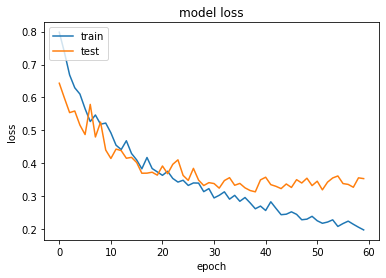

In [93]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

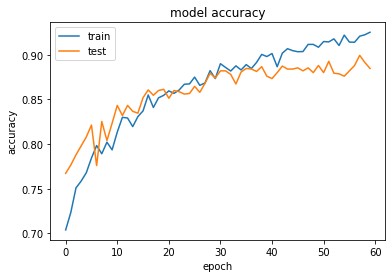

In [94]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
x_test1 = x_test.reshape(x_test.shape[0],28,28,1)

one_hot_label_test = to_categorical(y_test)

test_loss, test_acc = model.evaluate(x_test1,  one_hot_label_test, verbose=2)

print(test_loss,test_acc)

313/313 - 6s - loss: 0.3917 - accuracy: 0.8814
0.39173465967178345 0.8813999891281128


In [96]:
#weight printing 
for layer in model.layers: print(layer.get_config(), layer.get_weights())


{'name': 'conv2d_54', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[[[-0.0815283 , -0.06184484,  0.01392279,  0.12083559,
          -0.13232037,  0.10075135, -0.16314608,  0.15731393,
           0.17880309,  0.12046747, -0.04309149,  0.03122453,
           0.09801358, -0.12583277,  0.12622498,  0.15875836,
          -0.01353435, -0.23104951,  0.02374953,  0.08209562,
          -0.09181627,  0.14590105, -0.14631754, -0.22097243,
          -0.01119584, -0.18177244,  0.07271705, -0.00312411,